In [6]:
## 이번 장에 필요한 패키지들을 먼저 불러들임

import pandas as pd
import numpy as np
import os                                                   ## chdir 함수 사용위해서
import matplotlib.pyplot as plt                             ## 그림 그리기 위해서
from lifelines import KaplanMeierFitter                     ## KM 추정량 계산 위해서
from lifelines.statistics import logrank_test               ## 로그-순위 검정 위해서
from lifelines.statistics import multivariate_logrank_test  ## 세 집단 이상 비교하는 로그-순위 검정 위해서

In [2]:
## 디렉토리 설정
os.chdir("/Users/skang-imacpro/Dropbox/Sangwook/Teaching/YS-Naver/Survival/Data")
pbc = pd.read_csv("pbc_comp.csv")  ## pbc 자료 불러들이기

In [3]:
## 처리와 위약군을 비교하는 로그-순위 검정 실시

## lifelines 패키지에서 logrank_test 함수 호출
from lifelines.statistics import logrank_test  

tre1 = pbc.query("treat==1")  ## 처리군 자료 tre1로 저장
tre2 = pbc.query("treat==2")  ## 위약군 자료 tre1로 저장

## logrank_test 함수 사용 로그-순위 검정 실시
## 비교하고자 하는 그룹이 A, B라 할 때 
## logrank_test(그룹 A의 생존시간, 그룹 B의 생존시간, 그룹 A의 절단 여부, 그룹 B의 절단 여부)의 형식
results_tre = logrank_test(tre1["futime"], tre2["futime"], tre1["delta"], tre2["delta"])

## 로그-순위 검정의 결과 출력
results_tre.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.10 0.75      0.42

In [4]:
## Gehan/Breslow 가중치 이용한 가중 로그-순위 검정
results_tre_wil = logrank_test(tre1["futime"], tre2["futime"], tre1["delta"], tre2["delta"], weightings="wilcoxon")
results_tre_wil.print_summary()  ## 결과 출력

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.00 0.97      0.05

In [11]:
## Prentice/Peto 가중치 이용한 가중 로그-순위 검정
results_tre_peto=logrank_test(tre1["futime"], tre2["futime"], tre1["delta"], tre2["delta"], 
                              weightings="peto")
results_tre_peto.print_summary()  ## 결과 출력

<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           0.02 0.88      0.19

In [5]:
## Fleming/Harrington 가중치 이용한 가중 로그-순위 검정
## p=0, q=1: 누적분포함수를 가중치로 이용, 즉, 시간에 따라 증가하는 가중치
results_tre_flem=logrank_test(tre1["futime"], tre2["futime"], tre1["delta"], tre2["delta"], 
                              weightings="fleming-harrington", p=0, q=1)
results_tre_flem.print_summary()  ## 결과 출력

<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 0
                 q = 1
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           0.50 0.48      1.06

Text(0, 0.5, 'KM estimate of survival function')

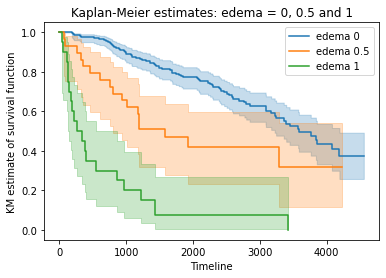

In [9]:
## 부종 (edema) 의 세 수준으로 정의되는 세 집단의 생존 함수 비교
## 로그-순위 검정 이용

## 세 집단에 대한 KM 추정치 plot 그리기 

edema0 = pbc.query("edema==0")     ## 부종 값이 0인 자료 저장
edema05 = pbc.query("edema==0.5")  ## 부종 값이 0.5인 자료 저장
edema1 = pbc.query("edema==1")     ## 부종 값이 1인 자료 저장

# 부종 값이 0인 집단에 대한 KM 추정 결과 저장
kmf_e0 = KaplanMeierFitter()
kmf_e0.fit(edema0["futime"], edema0["delta"], label="edema 0")

# 부종 값이 0.5인 집단에 대한 KM 추정 결과 저장
kmf_e05 = KaplanMeierFitter()
kmf_e05.fit(edema05["futime"], edema05["delta"], label="edema 0.5")

# 부종 값이 1인 집단에 대한 KM 추정 결과 저장
kmf_e1 = KaplanMeierFitter()
kmf_e1.fit(edema1["futime"], edema1["delta"], label="edema 1")

# 부종 KM 추정치 동시에 plot
kmf_e0.plot()
kmf_e05.plot()
kmf_e1.plot()
plt.title("Kaplan-Meier estimates: edema = 0, 0.5 and 1")    
plt.xlabel("Timeline")                          
plt.ylabel("KM estimate of survival function")

In [10]:
## 세 집단의 생존 함수를 비교하는 로그-순위 검정

## multivariate_logrank_test 함수 이용, 형식은 logrank_test 함수와 동일
multiresult = multivariate_logrank_test(pbc["futime"], pbc["edema"], pbc["delta"])
multiresult.print_summary()  ## 결과 출력

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         126.88 <0.005     91.53

In [12]:
## 예제: 가중 로그-순위 검정을 성별 생존 함수 비교에 적용

female = pbc.query("sex==1")  ## 여성 자료
male = pbc.query("sex==0")    ## 남성 자료

## 로그-순위 검정
results_sex = logrank_test(female["futime"], male["futime"], female["delta"], male["delta"])
results_sex.print_summary()  ## 결과 출력

## Gehan / Breslow 가중치 사용한 로그-순위 검정
results_sex_wil = logrank_test(female["futime"], male["futime"], female["delta"], male["delta"], 
                             weightings="wilcoxon")
results_sex_wil.print_summary()  ## 결과 출력

## Prentice / Peto 가중치 사용한 로그-순위 검정
results_sex_peto = logrank_test(female["futime"], male["futime"], female["delta"], male["delta"], 
                              weightings="peto")
results_sex_peto.print_summary()  ## 결과 출력

## Flemming / Harrington 가중치 사용한 로그-순위 검정 (p=0, q=1)
results_sex_flem = logrank_test(female["futime"], male["futime"], female["delta"], male["delta"], 
                              weightings="fleming-harrington", p=0, q=1)
results_sex_flem.print_summary()  ## 결과 출력

## Flemming / Harrington 가중치 사용한 로그-순위 검정 (p=1, q=1)
results_sex_flem11 = logrank_test(female["futime"], male["futime"], female["delta"], male["delta"], 
                              weightings="fleming-harrington", p=1, q=1)
results_sex_flem11.print_summary()  ## 결과 출력

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.27 0.04      4.69

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           4.26 0.04      4.68

<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           4.21 0.04      4.64

<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 0
                 q = 1
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           2.49 0.11      3.12

<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 1
                 q = 1
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           3.62 0.06      4.13